# Introduction 

The Project is a brief exploration of employee  data and here try to know which factors matter to determine why employee leave the job 
There is a csv file with employee data and if they left their job or not (column name: "left") - which is what you need to predict.

The column names are: 
1-	Satisfaction level 

2-	Last evaluation

3-	Number of projects

4-	Average monthly hours

5-	Time spent at the company

6-	Whether they have had a work accident

7-	Whether they have had a promotion in the last 5 years

8-	Department

9-	Salary

10-	Whether the employee has left  

Here, I did random forest , EDA , Linear regression and compare the result , cross validation , auc curve , " must modifay this"

# Import Libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Get the Data


In [2]:
df = pd.read_csv('HR_comma_sep.csv')

In [11]:
 df.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Start of cells by AK 

In [9]:
# sales (column name) better be called department
df.rename(columns={'sales':'dept'},inplace=True)
print(df['dept'].value_counts())
print(df['salary'].value_counts())

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: dept, dtype: int64
low       7316
medium    6446
high      1237
Name: salary, dtype: int64


In [10]:
df2 = pd.get_dummies(df, columns=['dept','salary'], drop_first=True)
df2.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1


In [13]:
X = df2.drop('left',axis=1)
y = df2['left']
print(X.shape)
print(y.shape)

(14999, 18)
(14999,)


# End of cells by AK



# EDA 


In [14]:
import seaborn as sns # for Interactive plots
import matplotlib.pyplot as plt # for plots
import itertools #matplotlib inline

In [ ]:
Note when i put the catiegory sales 

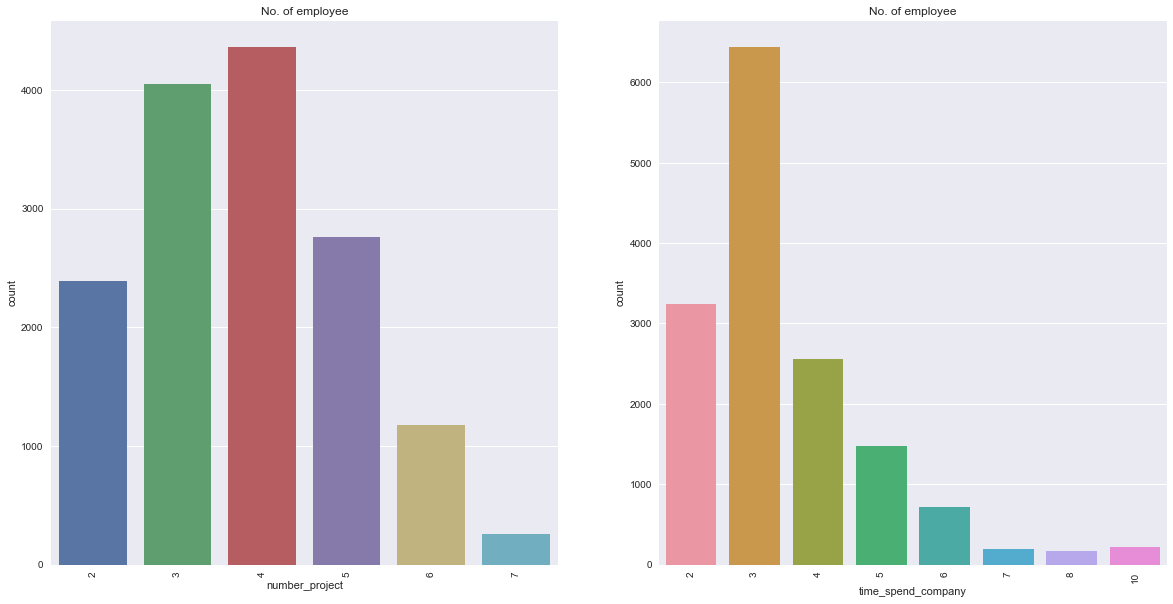

In [30]:
#Two categories are number_project,time spend_company
categorical=['number_project','time_spend_company']
fig=plt.subplots(figsize=(20,10))
length=len(categorical)
for i,j in itertools.zip_longest(categorical,range(length)): # itertools.zip_longest for to execute the longest loop
    plt.subplot(np.ceil(length/2),2,j+1)
    plt.subplots_adjust(hspace=.5)
    sns.countplot(x=i,data = df)
    plt.xticks(rotation=90)
    plt.title("No. of employee")


# Observations from number_project and time_speed_company
 For number_project ,the maximum employee are doing project between 3-5
For time_spend_company , In three years there are many employees who work in company but after 5 years there is a huge drop. 

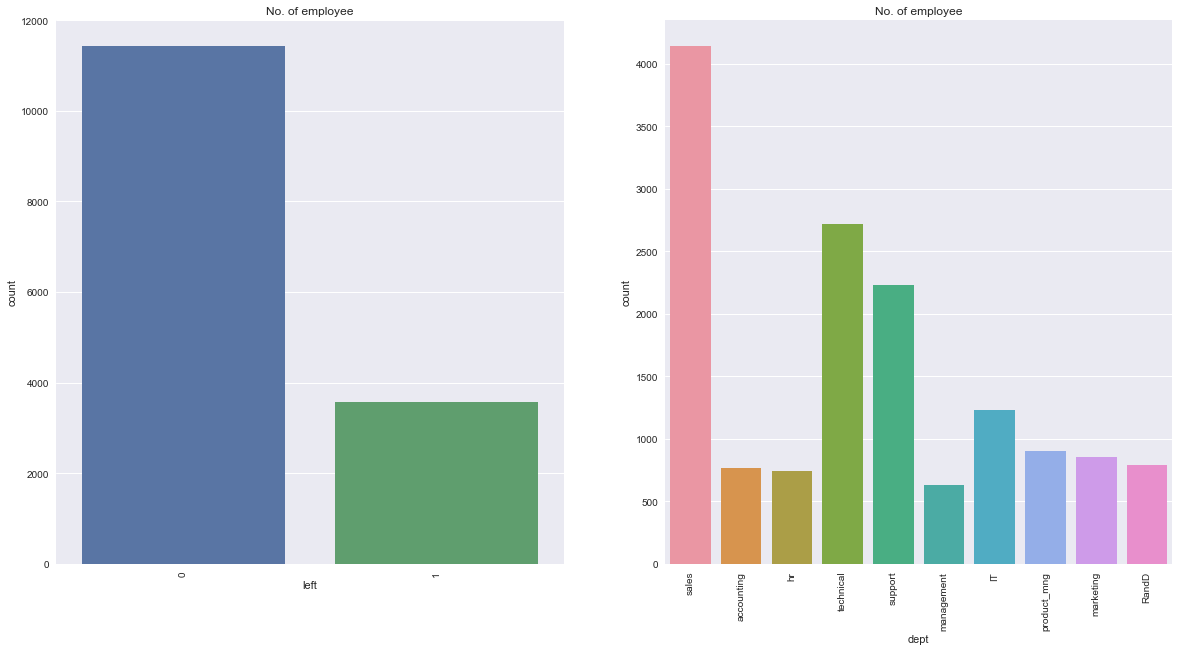

In [31]:
#Two categories are left,dept 
categorical=['left','dept']
fig=plt.subplots(figsize=(20,10))
length=len(categorical)
for i,j in itertools.zip_longest(categorical,range(length)): # itertools.zip_longest for to execute the longest loop
    plt.subplot(np.ceil(length/2),2,j+1)
    plt.subplots_adjust(hspace=.5)
    sns.countplot(x=i,data = df)
    plt.xticks(rotation=90)
    plt.title("No. of employee")

# Observations from left and dept
The number of employees left are less.
Sales department have maximum number of employees, after that technical,support and IT.




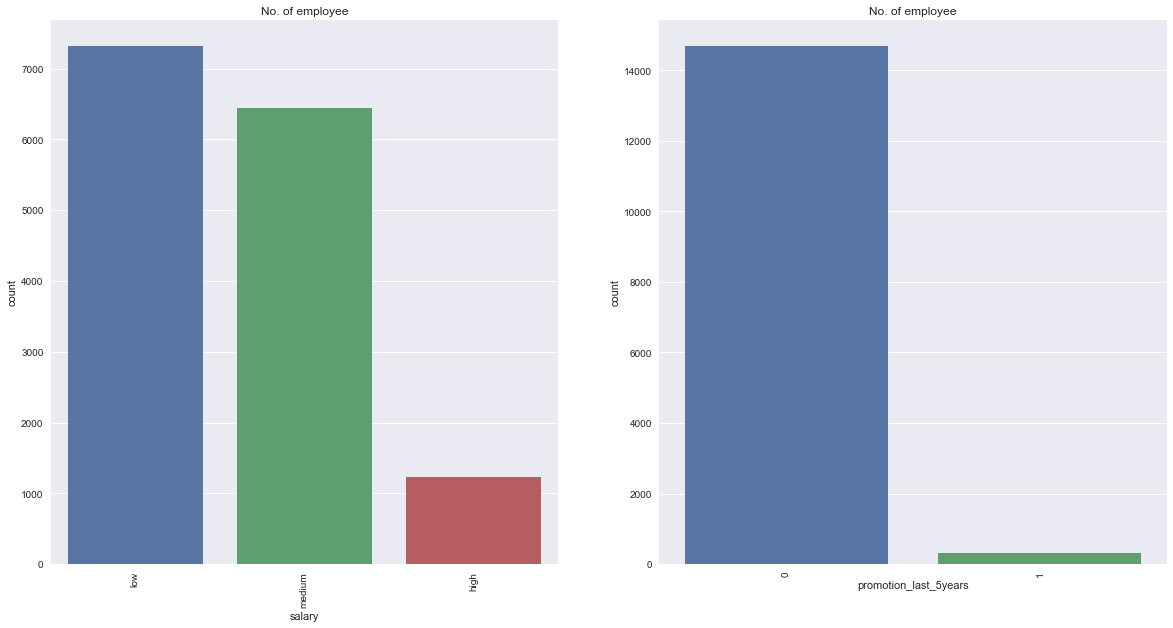

In [32]:
#Two categories are salary,promotion_last_5years
categorical=['salary','promotion_last_5years']
fig=plt.subplots(figsize=(20,10))
length=len(categorical)
for i,j in itertools.zip_longest(categorical,range(length)): # itertools.zip_longest for to execute the longest loop
    plt.subplot(np.ceil(length/2),2,j+1)
    plt.subplots_adjust(hspace=.5)
    sns.countplot(x=i,data = df)
    plt.xticks(rotation=90)
    plt.title("No. of employee")

# Observations from Salary and promotion_last_5years
The maximum employees get salary either medium or low, few number of employees get high salary
The number of employees who get the promotion in last 5 years is few



# Notice 
Here, the number of employee who leave and the ratio is 0.23 .

In [35]:
# No of employee who left the company 
print("The Number of employee who left the company :",len(df[df['left']==1]))
print("The Number of employee who didn't left the company",len(df[df['left']==0]))
print("The ratio of employee who left",len(df[df['left']==1])/len(df))



The Number of employee who left the company : 3571
The Number of employee who didn't left the company 11428
The ratio of employee who left 0.2380825388359224


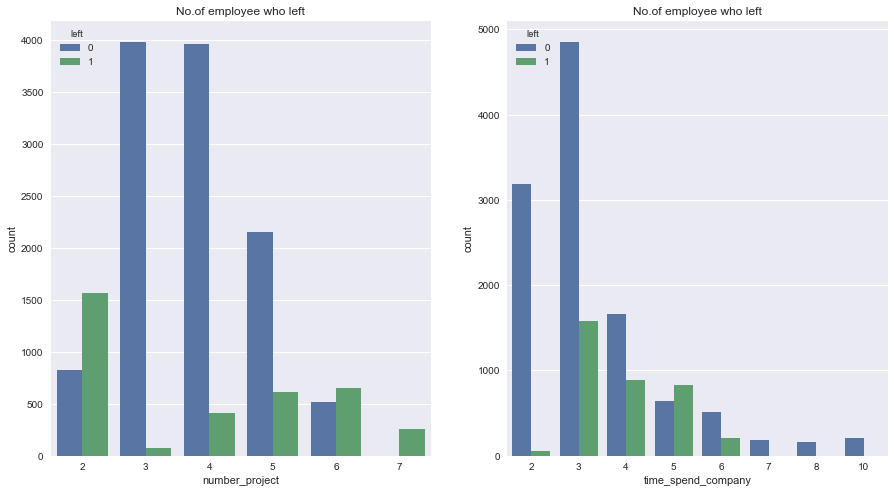

In [48]:
categorical=['number_project','time_spend_company'] # here I have removed left to see who is leaving cpmpany
fig=plt.subplots(figsize=(15,8))
length=len(categorical) 
for i,j in itertools.zip_longest(categorical,range(length)): # itertools.zip_longest for to execute the longest loop
    # this is to plot the subplots like as 2,2,1 it means 2x2 matrix and graph at 1 
    plt.subplot(np.ceil(length/2),2,j+1) 
    # to adjust the distance between subplots
    plt.subplots_adjust(hspace=.5) 
    # To plot the countplot of variable with hue left
    sns.countplot(x=i,data = df,hue="left") 
    plt.title("No.of employee who left") 

# Observations 
#areen don'tforget to comment 

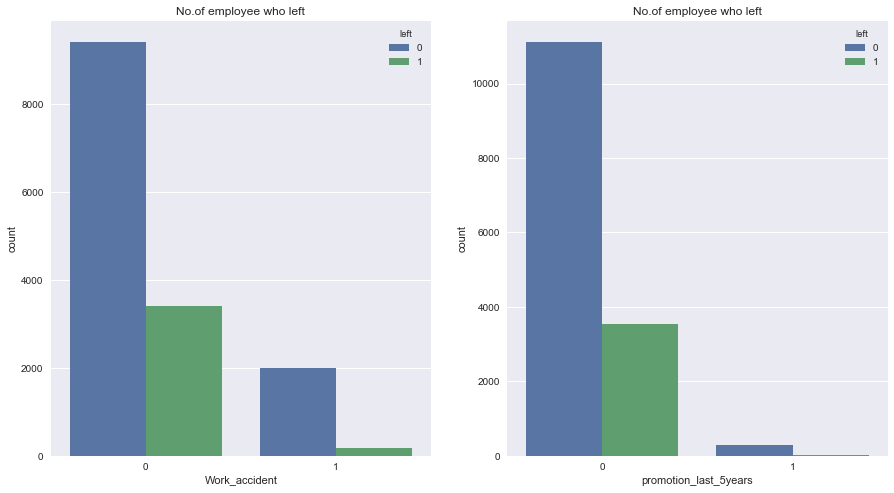

In [46]:
categorical=['Work_accident','promotion_last_5years'] # here I have removed left to see who is leaving cpmpany
fig=plt.subplots(figsize=(15,8))
length=len(categorical) 
for i,j in itertools.zip_longest(categorical,range(length)): # itertools.zip_longest for to execute the longest loop
    # this is to plot the subplots like as 2,2,1 it means 2x2 matrix and graph at 1 
    plt.subplot(np.ceil(length/2),2,j+1) 
    # to adjust the distance between subplots
    plt.subplots_adjust(hspace=.5) 
    # To plot the countplot of variable with hue left
    sns.countplot(x=i,data = df,hue="left")  
    plt.title("No.of employee who left") 

# Observations 
#areen don'tforget to comment 

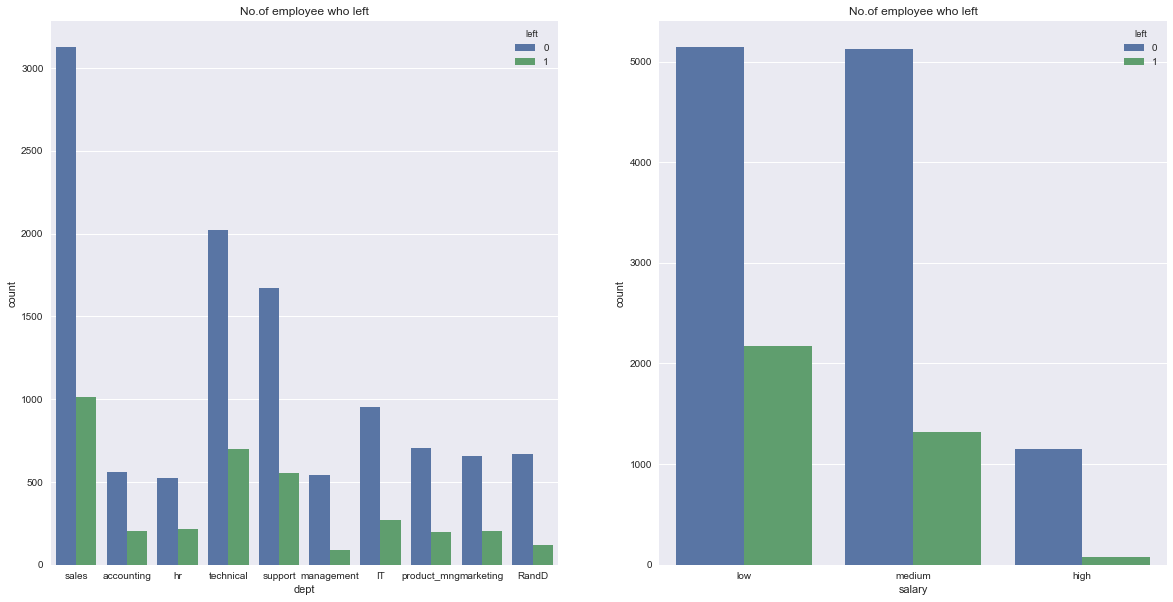

In [43]:
categorical=['dept','salary'] # here I have removed left to see who is leaving cpmpany
fig=plt.subplots(figsize=(20,10))
length=len(categorical) 
for i,j in itertools.zip_longest(categorical,range(length)): # itertools.zip_longest for to execute the longest loop
    # this is to plot the subplots like as 2,2,1 it means 2x2 matrix and graph at 1 
    plt.subplot(np.ceil(length/2),2,j+1) 
    # to adjust the distance between subplots
    plt.subplots_adjust(hspace=.6) 
    # To plot the countplot of variable with hue left
    sns.countplot(x=i,data = df,hue="left") 
    plt.title("No.of employee who left") 

# Observations 
#areen don'tforget to comment 

# Train Test Split
The data is splitted into a training set and a test set.



In [50]:
from sklearn.model_selection import train_test_split


In [51]:
X = df2.drop('left',axis=1)
y = df2['left']
print(X.shape)
print(y.shape)

(14999, 18)
(14999,)


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)


In [53]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [54]:
rfc_pred = rfc.predict(X_test)


In [56]:
from sklearn.metrics import classification_report,confusion_matrix


In [57]:
print(confusion_matrix(y_test,rfc_pred))


[[3377    9]
 [  45 1069]]


In [58]:
print(classification_report(y_test,rfc_pred))


             precision    recall  f1-score   support

          0       0.99      1.00      0.99      3386
          1       0.99      0.96      0.98      1114

avg / total       0.99      0.99      0.99      4500



# Cross Validation 



In [63]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


In [64]:
# read in the iris data
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target


In [65]:
# use train/test split with different random_state values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

# check classification accuracy of KNN with K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))


0.947368421053


In [66]:
from sklearn.model_selection import cross_val_score


In [67]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)


[ 1.          0.93333333  1.          1.          0.86666667  0.93333333
  0.93333333  1.          1.          1.        ]


In [68]:
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())


0.966666666667


In [69]:
# search for an optimal value of K for KNN
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)


[0.95999999999999996, 0.95333333333333337, 0.96666666666666656, 0.96666666666666656, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.98000000000000009, 0.96666666666666656, 0.96666666666666656, 0.97333333333333338, 0.95999999999999996, 0.96666666666666656, 0.95999999999999996, 0.96666666666666656, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337]


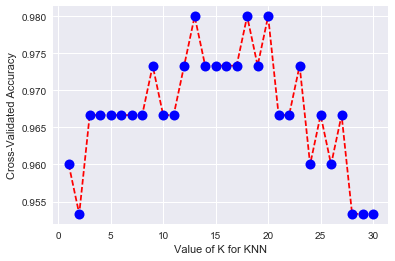

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)

plt.plot(k_range, k_scores,color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')


In [73]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression


In [77]:
# read in the advertising dataset
df = pd.read_csv('HR_comma_sep.csv', index_col=0)


In [79]:
# create a Python list of three feature names
feature_cols = ['number_project', 'salary', 'promotion_last_5years']

# use the list to select a subset of the DataFrame (X)
X = df[feature_cols]

# select the Sales column as the response (y)
y = df.left


In [88]:
# 10-fold cross-validation with all three features
lm = LinearRegression()
scores = cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')
print(scores)


ValueError: could not convert string to float: 'low'

In [84]:
# fix the sign of MSE scores
mse_scores = -scores
print(mse_scores)


[-0.93333333 -0.93333333 -1.         -0.93333333 -1.         -0.86666667
 -0.93333333 -0.93333333 -1.         -1.        ]


In [85]:
# fix the sign of MSE scores
mse_scores = -scores
print(mse_scores)


[-0.93333333 -0.93333333 -1.         -0.93333333 -1.         -0.86666667
 -0.93333333 -0.93333333 -1.         -1.        ]


In [86]:
# convert from MSE to RMSE
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)


[ nan  nan  nan  nan  nan  nan  nan  nan  nan  nan]


e:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app


In [87]:
# calculate the average RMSE
print(rmse_scores.mean())


nan


In [89]:
# 10-fold cross-validation with two features (excluding salary)
feature_cols = ['number_project', 'promotion_last_5years']
X = df[feature_cols]
print(np.sqrt(-cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')).mean())


TypeError: 'LinearRegression' object is not subscriptable

In [90]:
def main():
    
    columns = ["satisfaction_level", "last_evaluation", "number_project", "average_montly_hours", "time_spend_company",
            "Work_accident", "left", "gill-spacing", "promotion_last_5years", "dept",
            "salary"
            ]
    df = pd.read_csv("HR_comma_sep.csv", names=columns, index_col=None)

    le = LabelEncoder()
    X = df.drop("edible", axis=1)
    Y = le.fit_transform(dataset["edible"].values)
    kf = KFold(len(X), numFolds, shuffle=True)

    conv_X = pd.get_dummies(dataset[columns[1:]])

    # These are "Class objects". For each Class, find the AUC through
    # 10 fold cross validation.
    Models = [LogisticRegression, RandomForestClassifier, SVC]
    params = [{}, {}, {"probability": True}]
    for Model, param in zip(Models, params):
        total = 0
        for train_indices, test_indices in kf:

            # Get the dataset; this is the way to access values in a pandas DataFrame
            train_X = conv_X.ix[train_indices, :]; train_Y = Y[train_indices]
            test_X = conv_X.ix[test_indices, :]; test_Y = Y[test_indices]

            # Train the model, and evaluate it
            reg = Model(**param)
            reg.fit(train_X, train_Y)
            predictions = reg.predict_proba(test_X)[:, 1]
            fpr, tpr, _ = roc_curve(test_Y, predictions)
            total += auc(fpr, tpr)
        accuracy = total / numFolds
        print "AUC of {0}: {1}".format(Model.__name__, accuracy)


SyntaxError: invalid syntax (<ipython-input-90-e0b12f8ffd4a>, line 35)

In [91]:
def main():

    colnames = ["satisfaction_level", "last_evaluation", "number_project", "average_montly_hours", "time_spend_company",
            "Work_accident", "left", "gill-spacing", "promotion_last_5years", "dept",
            "salary"]
    df = pd.read_csv("HR_comma_sep.csv", names=colnames, index_col=None)

    le = LabelEncoder()
    X = df.ix[:, [0, 1, 2, 3, 4, 5]].values
    Y = le.fit_transform(dataset.ix[:, 6].values)
    kf = KFold(len(X), numFolds, shuffle=True)
    conv_X = pd.get_dummies(dataset.ix[:, [0, 1, 2, 3, 4, 5]])

    # These are "Class objects". For each Class, find the AUC through
    # 10 fold cross validation.
    Models = [LogisticRegression, RandomForestClassifier, SVC]
    params = [{}, {}, {"probability": True}]
    for Model, param in zip(Models, params):
        total = 0
        for train_indices, test_indices in kf:

            # Get the dataset; this is the way to access values in a pandas DataFrame
            train_X = conv_X.ix[train_indices, :]; train_Y = Y[train_indices]
            test_X = conv_X.ix[test_indices, :]; test_Y = Y[test_indices]

            # Train the model, and evaluate it
            reg = Model(**param)
            reg.fit(train_X, train_Y)
            predictions = reg.predict_proba(test_X)[:, 1]
            fpr, tpr, _ = roc_curve(test_Y, predictions)
            total += auc(fpr, tpr)
        accuracy = total / numFolds
        print "AUC of {0}: {1}".format(Model.__name__, accuracy)


SyntaxError: invalid syntax (<ipython-input-91-a4d50b87b3bb>, line 33)